In [256]:
!pip install -q celluloid plotly seaborn

In [257]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import HTML
from celluloid import Camera
from scipy.integrate import odeint
import seaborn as sns
sns.set() # Cambiando el estilo de las gráficas

from sympy import (
    symbols, Function, diff, sin, cos, simplify, Rational, Eq, Matrix,
    Derivative, solve, lambdify
)

# Mecánica Celeste
## 2023-II
## Set de Problemas No 4: Formalismos Lagrangiano y Hamiltoniano

Definamos algunas funciones utiles a través de la solución de los diferentes problemas, la primera es una función que encuentra la función de energía cinética a partir  de las ecuacionés de transfomación:

In [258]:
def kinetic_energy(transform_equations_per_particle):
    """
    Esta función recibe una lista de diccionarios, donde cada diccionario
    debe contener las ecuaciones de transformación de sympy y
    las variables generalizadas por cada ecuación, si no aparece la función
    se asume esta como 0, por ejemplo en el caso de z=0.

    Retorna la función de energía cinética del sistema considerando movimiento en x, y, z.
    """
    energy_total = 0  # Energía cinética total del sistema inicialmente es cero
    t = symbols('t')  # Símbolo para el tiempo

    # Procesamos cada partícula y calculamos su energía cinética
    for particle in transform_equations_per_particle:
        m = particle['mass']  # Masa de la partícula
        q = particle['q']  # Variables generalizadas como funciones del tiempo

        # Convertimos las variables generalizadas a funciones del tiempo 
        q_funcs = {qi: Function(str(qi))(t) for qi in q}
        
        # Sustituimos las variables generalizadas en las ecuaciones de transformación por las funciones
        x = particle['x'].subs(q_funcs) if 'x' in particle else 0
        y = particle['y'].subs(q_funcs) if 'y' in particle else 0
        z = particle['z'].subs(q_funcs) if 'z' in particle else 0

        # Calculamos las derivadas de x, y, y z con respecto al tiempo usando la regla de la cadena
        vx = x.diff(t) if 'x' in particle else 0
        vy = y.diff(t) if 'y' in particle else 0
        vz = z.diff(t) if 'z' in particle else 0

        # Calculamos la energía cinética de la partícula y la sumamos al total
        E = Rational(1, 2) * m * (vx**2 + vy**2 + vz**2)
        energy_total += E

    # Simplificamos la energía cinética total y la retornamos
    return simplify(energy_total)

In [259]:
def Q_k_from_T_total(T_function, qs):
    """
    Calcula las cantidades generalizadas Q_k a partir de 
    la función de energía cinética T_total y las variables generalizadas qs.

    :param T_function: La función de energía cinética T_total.
    :param qs: Lista de variables generalizadas qs que ya deben
    entrar como funciones del tiempo.
    :return: Lista de cantidades generalizadas Q_k.
    """
    
    Q = []
    t = symbols('t')  # Símbolo para el tiempo
    
    for q in qs:
        # Primero encontremos las derivadas respecto a las qs
        dT_dq = T_function.diff(q)

        # Ahora respecto a las q punto:
        dT_dq_dot = T_function.diff(Derivative(q, t))

        # Ahora eso lo derivamos respecto al tiempo
        dt_dT_dq_dot = dT_dq_dot.diff(t)

        #Añadimos a la lista nuestro resultado
        Q.append(simplify(dt_dT_dq_dot - dT_dq))
    
    return Q

**1. Tiempo en función de la posición angular.** Usando el formalismo lagrangiano para estudiar el problema de los 2 cuerpos, demuestre que la ecuación geométrica de la órbita relativa se escribe como

 \begin{equation}
    r = \frac{l^2/m_r^2 \mu}{1 + e \cos\theta}
 \end{equation}

 con $e = \sqrt{1 + 2l^2 E / m_r^3 \mu^2}$. Teniendo en cuenta la ecuación que define el momento angular total del sistema $l = m_r r^2\dot{\theta}$ deduzca la siguiente relación integral entre el tiempo y la variable angular

 \begin{equation}
     t - t_p = \frac{l^3}{m_r^3 \mu^2} \int_{0}^{\theta}\frac{d\theta'}{(1 + e\cos\theta')^2}
 \end{equation}

 el ángulo $\theta$ se mide desde el periapsis. Suponiendo una órbita parabólica integre la expresión anterior y muestre que

 \begin{equation}
     t - t_p = \frac{l^3}{m_r^3 \mu^2} \left(\tan\frac{\theta}{2} + \frac{1}{3}\tan^3\frac{\theta}{2}\right)
 \end{equation}

**2. Invarianza en el caso electromagnético.** De los resultados básicos de la teoría electromagnética se sabe que una partícula de masa $m$ moviéndose con velocidad $\vec{v}$ respecto a un campo electromagnético,  puede describirse mediante el siguiente lagrangiano

\begin{equation}
\displaystyle L = \frac{1}{2}mv^2 - q\phi + \frac{q}{c} \vec{A}\cdot \vec{v}
\end{equation}
  
  donde los campos eléctrico $\vec{E}$ y magnético $\vec{B}$ pueden derivarse a partir de los campos $\phi$ (el potencial escalar) y $\vec{A}$ (el potencial vectorial) como
  
\begin{equation}
  \displaystyle \vec{E} = -\nabla \phi - \frac{\partial \vec{A}}{\partial t}
\end{equation}

\begin{equation}
  \displaystyle \vec{B} = 	\nabla \times \vec{A}
\end{equation}
  
**a.** Encuentre las ecuaciones de Euler-Lagrange para la partícula. Hágalo para una sola coordenada generalizada ($x$ por ejemplo) y generalice el resultado a tres dimensiones. Evidentemente, deberá obtener las ecuaciones de Lorentz.

**b.** Ahora, si $L$ es un Lagrangiano de un sistema con $n$ grados de libertad que cumple con las ecuaciones de Lagrange, muestre que:

\begin{equation}
L' = L + \frac{dF(q_1,q_2,...,q_n,t)}{dt}
\end{equation}

también satisface las ecuaciones de Lagrange, donde F es es una función arbitraria, pero diferenciable.

**C.** Con base en el anterior resultado, estudie la invarianza del campo electromágnético bajo una transformación gauge de los potenciales escalar y vectorial, dada por:


<center>$A \to A + \nabla \psi(r,t)$</center>
    
<center>$\phi \to \phi - \frac{1}{c} \frac{\partial \psi}{\partial t}$</center>

donde $\psi$ es arbitraria (pero diferenciable). ¿Qué efecto tiene esta transformación gauge en el Lagrangiano de una partícula en movimiento en un campo electromagnético? ¿Se ve afectado el movimiento?

**3. Péndulo en soporte rotante.** Un péndulo de longitud $l$ y masa $m$ se encuentra fijado a un soporte de masa despreciable que gira en un circulo de radio $a$ en un plano vertical, con velocidad angular constante $\omega$. Encuentre las ecuaciones de movimiento del sistema, utilizando el formalismo Lagrangiano. Solucione numéricamente y grafique (simule) el movimiento del péndulo.



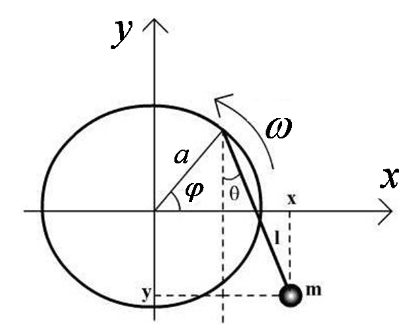

Para este ejercicio nuestra masa tiene 3 coordenadas y dos restricciones, la primera es el eje z=0 y la otra es la restrccion de movimiento al estar unida a una cuerda, esto nos deja 1 grado de libertad, para el cual debemos de solucionar nuestras ecuaciones, así que primero definamos las ecuaciones para nuestro sistema, teniendo en cuenta que el punto de agarre de la varilla esta constantemente moviendose a una velocidad angular constante por tanto ese punto de agarre esta en las posiciones x, y:

$$x_a = a cos(\varphi)$$
$$y_a = a sin(\varphi)$$

Así entonces la posición de la masa en el tiempo esta dada por:
$$x = l sin(\theta) + a cos(\varphi)$$ 
$$y = a sin(\varphi) - l cos(\theta)$$

tomando sus derivadas respecto al tiempo:
$$\dot{x} = l cos(\theta)\dot{\theta} - a sin(\varphi) \dot{\varphi}$$ 
$$\dot{y} = a cos(\varphi)\dot{\varphi} + l sin(\theta)$$



In [260]:
## Definamos las ecuaciones para nuestro sistema

# Definiendo los simbolos  de nuestro problema:
a, l, m, g =  symbols('a l m g')

# Variables dependientes de tiempo
t = symbols('t')  # Símbolo para el tiempo
theta = Function('theta')(t)
phi = Function('phi')(t)
w = Function('w')(t)
# Ahora la posición de la masa teniendo en cuenta el movimiento del punto de agarre
x = Function('x')(t)
y = Function('y')(t)

# Armemos las ecuaciones
x_m = l*sin(theta) + a*cos(phi)
y_m = a*sin(phi) - l*cos(theta) # El menos es debido a la direccion de los ejes

xm_equation = Eq(x, x_m)
ym_equation = Eq(y, y_m)

# Mostremos nuestras ecuaciones
display(xm_equation, ym_equation)

Eq(x(t), a*cos(phi(t)) + l*sin(theta(t)))

Eq(y(t), a*sin(phi(t)) - l*cos(theta(t)))

In [261]:
t = symbols('t')  # Símbolo para el tiempo
theta = symbols('theta')
# Lista de ecuaciones de transformación para cada partícula
transform_equations_per_particle = [
    {
        'mass': m, # Masa de la primera particula
        'x': x_m,  # Ecuaciones de transformación de coordenadas
        'y': y_m,
        'q': [theta], # Variables generalizadas
    }
]

# Calcular la función de energía cinética del sistema
T_total = kinetic_energy(transform_equations_per_particle)

# Imprimir la energía cinética
T = symbols('T') # Asignandole un simbolo a la energía cinética
Ttotal_equation = Eq(T, T_total)
print('Ecuación de energía cinética del sistema:')
display(Ttotal_equation)

Ecuación de energía cinética del sistema:


Eq(T, m*(a**2*Derivative(phi(t), t)**2 - 2*a*l*sin(phi(t) - theta(t))*Derivative(phi(t), t)*Derivative(theta(t), t) + l**2*Derivative(theta(t), t)**2)/2)

In [262]:
# Ugen
# Definir el símbolo para la energía potencial generalizada
Ugen = symbols("Ugen")

# Calcular la energía potencial como la suma de las energías potenciales gravitacionales de las dos masas
potential_function = Eq(Ugen,
simplify(m*g*y_m))

# Mostrar la ecuación de la energía potencial
display(potential_function)

Eq(Ugen, g*m*(a*sin(phi(t)) - l*cos(theta(t))))

Encontrando el lagrangiano

In [263]:
# Definir el símbolo del Lagrangiano
L = symbols('L')

# Calcular el Lagrangiano como la diferencia entre la función energía cinética
# y la función de energía potencial generalizada
Lagrangiano = simplify(Ttotal_equation.rhs - potential_function.rhs)

# Crear la ecuación del Lagrangiano
Lagrangiano_equation = Eq(L, Lagrangiano)

# Mostrar la ecuación del Lagrangiano
display(Lagrangiano_equation)

Eq(L, m*(a**2*Derivative(phi(t), t)**2 - 2*a*l*sin(phi(t) - theta(t))*Derivative(phi(t), t)*Derivative(theta(t), t) - 2*g*(a*sin(phi(t)) - l*cos(theta(t))) + l**2*Derivative(theta(t), t)**2)/2)

In [265]:
theta = Function('theta')(t)

# Calcular las ecuaciones de Euler-Lagrange
Euler_Lagrange_equations = Q_k_from_T_total(Lagrangiano, [theta])

# Imprimir los resultados
equation_E_L_1 = Eq(0, Euler_Lagrange_equations[0])

# Mostrar los resultados de las ecuaciones de Euler-Lagrange
display(equation_E_L_1)

Eq(0, l*m*(-a*sin(phi(t) - theta(t))*Derivative(phi(t), (t, 2)) - a*cos(phi(t) - theta(t))*Derivative(phi(t), t)**2 + g*sin(theta(t)) + l*Derivative(theta(t), (t, 2))))

---

In [266]:

# Calcular las ecuaciones de Euler-Lagrange
Euler_Lagrange_equations = Q_k_from_T_total(Lagrangiano, [theta])

d2_theta =  solve(Euler_Lagrange_equations[0], Derivative(theta, t, 2))[0]
# Reempazando w
d2_theta_w = simplify(d2_theta.subs(
    {Derivative(theta, t): w,
    Derivative(phi, t, 2): 0}))

display(d2_theta_w)
# Llevando esto a una función de python
d2_theta_w_function = lambdify((theta, w, a, l, m, g, phi, Derivative(phi, t)), d2_theta_w)

(a*cos(phi(t) - theta(t))*Derivative(phi(t), t)**2 - g*sin(theta(t)))/l

In [274]:
# Función de pyhton con nuestra ED
def ddot_theta(a, l, m, g, theta, phi, dotphi, w):
    ddot_theta_ = (a*dotphi*w**2*np.cos(theta-phi) -a*dotphi*np.cos(theta - phi)*(w-dotphi) - g*w*np.sin(theta))/l
    #ddot_theta_ = (a* dotphi**2 * np.cos(phi-theta) - g*np.sin(theta))/l
    return ddot_theta_

In [275]:
def system(y, t, a, l, m, g, dotphi):

    # Condicions iniciales
    theta, w  = y 
    
    # Obteniendo a phi de la dotphi
    phi = dotphi*t
    # Evaluar las funciones numéricas
    ddot_theta_ = ddot_theta(a, l, m, g, theta, phi, dotphi, w)
    
    # Las derivadas de theta es simplemente w
    dtheta_dt = w

    # Retornando los valores númericos obtenidos en el formato que odeint requiere
    return [ddot_theta_, dtheta_dt]

In [276]:

# Parámetros del sistema
a, l, m, dotphi, g = 1, 1, 1, 1, 9.8  

# Condiciones iniciales
y0 = [np.pi/4, 0]  

# Array de tiempo para la integración
numero_puntos = 100
t_integrate = np.linspace(0, 1, numero_puntos)  

# Integración con odeint
solution = odeint(system,
                   y0, t_integrate, args=(a, l, m, dotphi, g))

In [277]:
# Creando la figura
fig = plt.figure()

# Inicializar la cámara para capturar cada cuadro de la animación
camera = Camera(fig)

# Establecer que los ejes X y Y tengan la misma escala
plt.axis('equal')

# Agregando un titulo a nuestra figura
plt.title('''Simulación del movimiento del péndulo 
    Formalismo Lagrangiano''', fontweight='bold')

# Haciendo un ciclo para obtener cada captura
for i, t in zip(range(0, numero_puntos), t_integrate):
    # veamos en que valor va phi
    phi = dotphi * t

    # Calcula las posiciones (x, y) para la masa 
    x = l*np.sin(solution[i, 0]) + a*np.cos(phi)
    y = a*np.sin(phi) - l*np.cos(solution[i, 0])

    # Agreguemos la posición del circulo para dibujar a la varilla
    x_c = a*np.cos(phi)
    y_c = a*np.sin(phi)
    

    # Dibujando las masas junto con sus estelas
    plt.plot([x_c, x], [y_c, y], 'k-')  # Varilla del origen a la masa 1
    plt.plot(x, y, 'ro')  


    camera.snap()  # Tomando capturas de cada instante de la gráfica

# Para que no quede un gráfico en blanco para la salida, cerramos la figura
plt.close(fig)

# Animación con intervalo de 50 milisegundos entre cuadros
anim = camera.animate(interval=100)

# Mostrar animación en formato HTML
HTML(anim.to_html5_video())

---

Con estas expresiones ya podemos encontrar nuestra función de energía cinética, con la función que encuentra la energía cinética a partir de la ecuacion de transformación:

In [278]:
Lagrangiano = Rational(1, 2)*m *( l**2*Derivative(theta, t)**2 + a**2*Derivative(phi,t)**2 + 2*a*l*Derivative(phi,t)*Derivative(theta,t)*sin(theta-phi))- m*g*(a*sin(phi)-l*cos(theta))
Lagrangiano

ValueError: 
Can't calculate derivative wrt 1.00000000000000.

In [ ]:


# Calcular las ecuaciones de Euler-Lagrange
Euler_Lagrange_equations = Q_k_from_T_total(Lagrangiano, [theta])

Euler_Lagrange_equations[0]

l*m*(-a*sin(phi(t) - theta(t))*Derivative(phi(t), (t, 2)) - a*cos(phi(t) - theta(t))*Derivative(phi(t), t)**2 + g*sin(theta(t)) + l*Derivative(theta(t), (t, 2)))

**4. Péndulo doble I.** El péndulo doble, como se muestra en la figura, está formado por dos péndulos simples de longitudes $l_1$ y $l_2$, de los que cuelgan partículas de masas $m_1$ y $m_2$.  En un instante determinado $t$, los hilos inextensibles forman ángulos $θ_1$ y $θ_2$ con la vertical.

**a.** Encuentre las ecuaciones de movimiento utilizando el formalismo lagrangiano.

**b.** Solucione numéricamente las ecuaciones del péndulo doble y grafique su movimiento en el espacio de configuración. Luego, estudie el caos en éste sistema, es decir, grafique simultáneamente dos pendulos dobles que arranquen de condiciones iniciales muy cercanas, de modo que se vea que divergen con el tiempo (Ejemplo: https://images.app.goo.gl/TyiUFQb6DaMpKSvAA).

**Reto [opcional].** Realice el mismo procedimiento para el caso de 3 péndulos y luego generalice para $n$ péndulos.

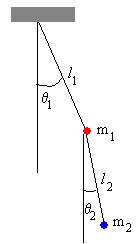

**5. Péndulo móvil.** Una masa $m_1$ se desliza de forma horizontal y sin fricción sobre un soporte de masa despreciable. Una segunda masa $m_2$ está atada a $m_1$ por medio de una cuerda de longitud $l$ y masa despreciable
(ver figura). Encuentre las ecuaciones de movimiento del sistema, utilizando el formalismo Lagrangiano. Solucione numéricamente y grafique (simule) el movimiento del péndulo.

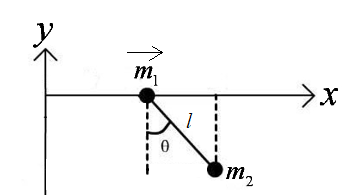

 **6. El CRTBP coplanar.** Una partícula de prueba de masa $m$ se mueve sobre el plano de Laplace de otros dos cuerpos de masas ($1 - \alpha$) y $\alpha$ las cuales son mucho mayores que $m$ y determinan su dinámica. En este caso, el Hamiltoniano se escribe como

 $$
 H = \frac{p_x^2}{2m} + \frac{p_y^2}{2m} + p_x y' - p_y x' - (1-\alpha)\frac{m}{r_1} - \alpha\frac{m}{r_2}
 $$

 con $r_1 = \sqrt{(x' + \alpha)^2 + y'^2}$ y $r_2 = \sqrt{[x' - (1- \alpha)]^2 + y'^2}$ . Las variables primadas están referidas a un sistema que rota con velocidad angular constante igual a la unidad.

 Encuentre las ecuaciones Hamiltonianas de movimiento para este sistema.

 **7. Partícula deslizándose sobre un alambre parabólico.** Una partícula de masa $m$ se desliza bajo la acción de la gravedad y sin fricción sobre un alambre con forma de parábola.

**a.** Demuestre que el Hamiltoniano de este sistema se escribe como

\begin{equation}
  H(x,p) = \frac{p^2}{2m(1+x^2)} + \frac{mg}{2}x^2
\end{equation}


**b.** Grafique e interprete los contornos de nivel para este Hamiltoniano.


**8. El Hamiltoniano de Hénon-Heiles.** En 1964, M. Hénon y C.Heiles estudiaban el movimiento de las estrellas alrededor del centro galáctico tratando de encontrar una tercera constante de movimiento a parte del momentum angular y la energía. Esto les llevo a proponer un potencial idealizado que restringía su acción solo al plano x, y. Este potencial se caracteriza por poseer dos términos cúbicos que involucran a las variables x, y haciendo a las ecuaciones de movimiento resultantes no lineales y acopladas. El Hamiltoniano asociado es el Hamiltoniano de Hénon-Heiles que en coordenadas cartesianas se escribe como

\begin{equation}
 H = \frac{p_x^2}{2m} + \frac{p_y^2}{2m} + \frac{1}{2}(x^2+y^2) + x^2y - \frac{1}{3}y^3
\end{equation}

**a.** ¿El Hamiltoniano de Hénon-Heiles coincide con la energía?

**b.** Deduzca las ecuaciones Hamiltonianas de movimiento para una masa m sometida a este potencial. Tenga en cuenta que $p_x = m\dot{x}$ y $p_y = m\dot{y}$.

**c.** Para un par de condiciones iniciales apropiadas (fije un valor de la energía y encuentre valores de las variables generalizadas que la satisfagan) integre numéricamente las ecuaciones de movimiento usando el método de Euler y el integrador simpléctico Leap-Frog (Consultar). Grafique el comportamiento de la energía como función del tiempo ¿Es la energía una cantidad conservada con ambos esquemas?

**d.** Grafique la trayectoria en el espacio de configuración.

**e.** Grafique los contornos de nivel del potencial para distintos valores de la energía (E = $1/6$, $1/8$, $1/12$, $1/24$, $0,01$) y relacione los resultados con el inciso anterior.

---

**9. Mecánica generalizada.** El término _mecánica generalizada_ se usa para designar una variación de la mecánica clásica en la que el Lagrangiano contiene derivadas temporales de $q_i$ más allá de primer orden. Problemas en los que $x = f(x,\dot{x},\ddot{x},t)$ han sido nombrados en inglés como _"jerky mechanics"_. Tales ecuaciones de movimiento tienen interesantes aplicaciones en teoría de caos (las cuales no trabajaremos).

Aplicando los métodos del cálculo de variaciones, muestre que si hay un lagrangiano de la forma $L(q_i,\dot{q}_i,\ddot{q}_i,t)$, y el principio de Hamilton permanece con la invarianza de $q_i$ y $\dot{q}_i$ en los extremos, entonces las ecuaciones de Euler-Lagrange correspondientes son:

\begin{equation}
\frac{d^2}{dt^2}\Big(\frac{\partial L}{\partial \ddot{q_i}}\Big) - \frac{d}{dt}\Big(\frac{\partial L}{\partial \dot{q_i}}\Big) + \frac{\partial L}{\partial q_i} = 0. \qquad i = 1,2,... ,n.
\end{equation}

Aplique el resultado al Lagrangiano:

\begin{equation}
L = -\frac{m}{2}q\ddot{q} - \frac{k}{2}q^2
\end{equation}

¿Reconoce las ecuaciones de movimiento encontradas?

Para la realización de la demostración vamos a usar el principio de minima acción, así que definamos la acción:

$$S = \int_{t_1}^{t_2} L(q, \dot{q}, \ddot{q},t)dt$$

veamos un delta de la acción:
$$\delta S = \int_{t_1}^{t_2} \delta L(q, \dot{q}, \ddot{q},t)dt$$

usando la regla de la cadena podemos encontrar que:

$$\delta S = \int_{t_1}^{t_2} \frac{\partial L}{\partial q} \delta q +
                            \frac{\partial L}{\partial \dot{q}} \delta \dot{q} +
                            \frac{\partial L}{\partial \ddot{q}} \delta \ddot{q} dt
$$


Ahora analicemos algunos terminos por separado:
$$
\frac{\partial L}{\partial \dot{q}} \delta \dot{q}= 
                    \frac{d}{dt}(\frac{\partial L}{\partial \dot{q}}  \delta_{\dot q})
                    -\frac{d}{dt}\frac{\partial L}{\partial \dot{q}} \delta_q
$$

$$
\frac{\partial L}{\partial \ddot{q}} \delta \ddot{q} dt =
\frac{\partial L}{\partial \ddot{q}}\frac{d}{dt} \delta_{\dot q} = 
\frac{d}{dt}(\frac{\partial L}{\partial \ddot{q}}\frac{d}{dt} \delta_q) -
\frac{d}{dt}\frac{\partial L}{\partial \ddot{q}}\frac{d}{dt} \delta_q
$$            

reemplazando en la integral:

$$
\delta S = \int_{t_1}^{t_2} \frac{\partial L}{\partial q} \delta q +
\frac{d}{dt}(\frac{\partial L}{\partial \dot{q}}  \delta_{\dot q})
-\frac{d}{dt}\frac{\partial L}{\partial \dot{q}} \delta_q +
\frac{\partial L}{\partial \ddot{q}}\frac{d}{dt} \delta_{\dot q} = 
\frac{d}{dt}(\frac{\partial L}{\partial \ddot{q}}\frac{d}{dt} \delta_q) -
\frac{d}{dt}\frac{\partial L}{\partial \ddot{q}}\frac{d}{dt} \delta_q
$$

Sepandola en una suma de integrales
$$
\delta S = \int_{t_1}^{t_2} \frac{\partial L}{\partial q} \delta q +
 \int_{t_1}^{t_2} (\frac{\partial L}{\partial q}-\frac{d}{dt}\frac{\partial L}{\partial \dot{q}}) \delta_q dt + 
 \int_{t_1}^{t_2} \frac{\partial L}{\partial \dot{q}}\delta_q -
\int_{t_1}^{t_2} \frac{d}{dt}\frac{\partial L}{\partial \ddot{q}}\frac{d}{dt} \delta_q dt
$$

La primera y la tercera integral son cero al no tener una dependencia con el tiempo, ahora para la ultima integral de nuestra expresión debemos tener en cuenta que:

$$
\frac{d}{dt}\frac{\partial L}{\partial \ddot{q}}\frac{d}{dt} \delta_q = 
\frac{d}{dt}(\frac{d}{dt}\frac{\partial L}{\partial \ddot{q}}\delta_{\dot{q}} )-
\frac{d^2}{dt^2}\frac{\partial L}{\partial \ddot{q}} \delta_q
$$

uniendo las integrales restantes y reemplazando este termino, podemos obetener que:
$$
\delta S = \int_{t_1}^{t_2} (\frac{\partial L}{\partial q}-\frac{d}{dt}\frac{\partial L}{\partial \dot{q}} + \frac{d^2}{dt^2}\frac{\partial L}{\partial \ddot{q}} ) \delta_q dt -
\int_{t_1}^{t_2} \frac{d}{dt}(\frac{d}{dt}\frac{\partial L}{\partial \ddot{q}}\delta_{\dot{q}} )
$$

Nuestra segunda integral es cero, ya que la variaación es cero en los extremos:

Ahora minimizamos la acción así que $\delta S = 0$, dejandonos que:

$$
\frac{d^2}{dt^2}\frac{\partial L}{\partial \ddot{q}} 
-\frac{d}{dt}\frac{\partial L}{\partial \dot{q}} + \frac{\partial L}{\partial q}  = 0
$$

y esto es justo lo que buscamos demostrar

Ahora apliquemos esto para nuestro lagragiano específico:
$$
L = -\frac{m}{2}q\ddot{q} - \frac{k}{2}q^2
$$
Hagamoslo por pasos y después unimos las partes
$$
\frac{\partial L}{\partial \ddot{q}} = 
-\frac{m}{2}q
$$

$$
\frac{d^2}{dt^2}\frac{\partial L}{\partial \ddot{q}} =
-\frac{m}{2}\ddot{q}
$$

$$
\frac{\partial L}{\partial \dot{q}} = 0
= \frac{d}{dt}\frac{\partial L}{\partial \dot{q}} 
$$

$$
\frac{\partial L}{\partial q} = -\frac{m}{2}\ddot{q} - kq
$$

Como:
$$
\frac{d^2}{dt^2}\frac{\partial L}{\partial \ddot{q}} 
-\frac{d}{dt}\frac{\partial L}{\partial \dot{q}} + \frac{\partial L}{\partial q}  = 0
$$

reemplazando nuestras expresiones nos queda como:
$$
-\frac{m}{2}\ddot{q} -\frac{m}{2}\ddot{q} - kq = 0
$$

$$
m \ddot{q} + kq = 0
$$

si $\frac{k}{m} = w$, entonces:

$$
 \ddot{q} + wq = 0
$$

esta expresión correponde a la ED que descirbe el movimiento de un oscilador armonico simple

reem